# Pratica 5 - Modelos de Linguagem
Modelos de Linguagem envolvem a estimação de probabilidades condicionais de ocorrência de um termo dado um contexto. 
$$P_{bi}(t_1t_2t_3t_4) = P(t_1)P(t_2|t_1)P(t_3|t_1t_2)P(t_4|t_1t_2t_3)$$

In [11]:
import nltk
import string
from nltk.corpus import machado
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
# %pylab inline

### Modelo Unigrama  (bag of words)
 neste modelo, a ordem das palavras não importa. 
 $$P_{bi}(t_1t_2t_3t_4) = P(t_1)P(t_2)P(t_3)P(t_4)$$

In [6]:
nltk.download('machado')
nltk.download('stopwords')

[nltk_data] Downloading package machado to /home/fccoelho/nltk_data...
[nltk_data]   Package machado is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fccoelho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
swu = set(stopwords.words('portuguese') + list (string.punctuation) + ['\x97','--','...'])
wordgen = (word for word in machado.words() if word.lower() not in swu and len(word)>=3)
fd = nltk.FreqDist(wordgen)
fd.most_common(20)

[('disse', 6444),
 ('casa', 4821),
 ('tempo', 4339),
 ('ainda', 4226),
 ('coisa', 3999),
 ('dia', 3959),
 ('olhos', 3936),
 ('tudo', 3879),
 ('outro', 3652),
 ('nada', 3648),
 ('tão', 3592),
 ('outra', 3553),
 ('dois', 3494),
 ('homem', 3249),
 ('porque', 3211),
 ('vez', 3207),
 ('pouco', 3018),
 ('todos', 2989),
 ('dizer', 2938),
 ('vida', 2884)]

In [26]:
x,y = zip(*fd.most_common(20))

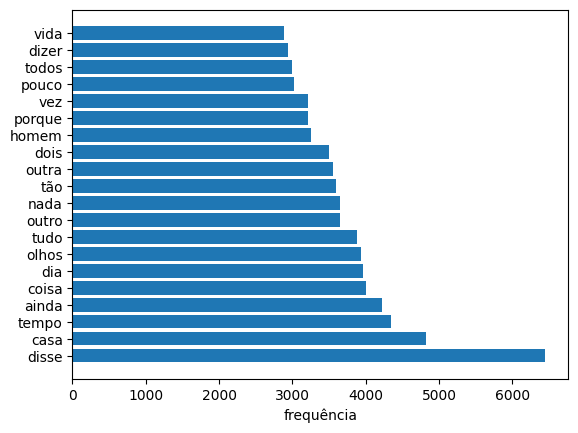

In [27]:
plt.barh(range(len(x)),width=y);
ax = plt.gca()
ax.set(yticks=range(len(x)),yticklabels=x);
plt.xlabel('frequência');

### Bigramas
Uma alternativa ao modelo bag-of-words onde as probabilidades são independentes, é o modelo bigrama. onde calculamos a probabilidade de ocorrência de uma palavra condicionada à ocorrência da anterior.
$$P_{bi}(t_1t_2t_3t_4) = P(t_1)P(t_2|t_1)P(t_3|t_2)P(t_4|t_3)$$
nltk.ConditionalFreqDist é um estimador de probabilidades condicionais. Dada uma lista de bigramas, para cada palavra no vocabulário, ele calculará uma distribuição de frequências para a próxima palavra.

In [92]:
wordgen = (word.lower() for word in machado.words() )#if word.lower() not in swu)
machado_2gram = nltk.ConditionalFreqDist(nltk.bigrams(wordgen))

*conditions()* retorna as palavras para as quais temos distribuições condicionais construídas.

In [93]:
machado_2gram.conditions()

['conto',
 ',',
 'contos',
 'fluminenses',
 '1870',
 'texto',
 '-',
 'fonte',
 ':',
 'obra',
 'completa',
 'machado',
 'de',
 'assis',
 'vol',
 '.',
 'ii',
 'rio',
 'janeiro',
 'nova',
 'aguilar',
 '1994',
 'publicado',
 'originalmente',
 'pela',
 'editora',
 'garnier',
 'em',
 'índice',
 'miss',
 'dollar',
 'luís',
 'soares',
 'a',
 'mulher',
 'preto',
 'o',
 'segredo',
 'augusta',
 'confissões',
 'uma',
 'viúva',
 'moça',
 'linha',
 'reta',
 'e',
 'curva',
 'frei',
 'simão',
 'capítulo',
 'primeiro',
 'iii',
 'iv',
 'v',
 'vi',
 'vii',
 'viii',
 'era',
 'conveniente',
 'ao',
 'romance',
 'que',
 'leitor',
 'ficasse',
 'muito',
 'tempo',
 'sem',
 'saber',
 'quem',
 'mas',
 'por',
 'outro',
 'lado',
 'apresentação',
 'seria',
 'autor',
 'obrigado',
 'longas',
 'digressões',
 'encheriam',
 'papel',
 'adiantar',
 'ação',
 'não',
 'há',
 'hesitação',
 'possível',
 'vou',
 'apresentar',
 'lhes',
 'se',
 'é',
 'rapaz',
 'dado',
 'gênio',
 'melancólico',
 'imagina',
 'inglesa',
 'pálida',
 '

Podemos obter a contagem de palavras que se seguem à uma palavra específica.

In [94]:
machado_2gram['exercia']

FreqDist({'um': 4, 'o': 4, 'sobre': 4, 'a': 3, 'nela': 3, 'desde': 2, 'em': 2, 'aquele': 1, 'outra': 1, '-': 1, ...})

Ou podemos obter a Probabilidade por máxima verossimilhança:

In [95]:
machado_2gram_cp = nltk.ConditionalProbDist(machado_2gram, nltk.MLEProbDist)

In [96]:
cp = machado_2gram_cp['exercia']
cp.samples()

dict_keys(['a', 'aquele', 'um', 'outra', 'o', '-', 'de', 'desde', 'nela', 'na', 'uma', 'as', 'sobre', 'esse', 'no', 'nele', 'em', 'mais', 'então', 'interinamente', 'com', 'realmente'])

In [97]:
cp.prob('sobre')

0.10810810810810811

In [98]:
cp.prob('nela')

0.08108108108108109

In [99]:
machado_2gram_cp['exercia'].generate()

'uma'

In [100]:
def gera_texto(palavra_inicial, cpd,numero=50):
    
    w = palavra_inicial
    texto = w
    for i in range(numero):
        w2 = cpd[w].generate()
        sep = ' ' if w2 not in string.punctuation else ''
        texto += sep + w2
        w = w2
    return texto

In [158]:
gera_texto('cresceu',machado_2gram_cp, numero=200)

'cresceu com este tempo em dizer, o intenso, é um segmento de linho com a velha, fizesse barulho muito contente quando acordava duas há de fugir ao pai e tempo de oliver, e os flagelos destinados a mim, despovoou- me hei de cativa ou vão se perdem- se apaga sinistramente nos veremos. como moedas passaram, modesta, como disse- o achado. arranjávamos um prêmio? é só a moça não assim um modo é uma aberta até quinta, eram recriminações e as mãos frias; viçosas; o digno rui barbosa que acabou a eminente nas poucas vezes alguns minutos, mas as frutas, confessando a educação, patologia. helena. foi só muito fazendo. ainda que não há porém, não precisa. e o público àquela sociedade qualquer parte importante do esforço e os poetas. vá perdê- lhe o padre sá estava bonachão. alguns gaiatos, objeto de um desses tapamentos de província surgiu- pierre- ganha, tem ódio que devera ser de raquel, sem operações comuns. não se dentro era natural vir! eu tinha um'

## Modelo de Trigramas

In [102]:
from nltk.tokenize import sent_tokenize

In [140]:
wordgen2 = (word.lower() for word in machado.words())
corpus = (((x,y),z) for x, y, z in nltk.trigrams(wordgen2))
machado_3gram = nltk.ConditionalFreqDist(corpus)

In [141]:
machado_3gram.conditions()

[('conto', ','),
 (',', 'contos'),
 ('contos', 'fluminenses'),
 ('fluminenses', ','),
 (',', '1870'),
 ('1870', 'contos'),
 ('fluminenses', 'texto'),
 ('texto', '-'),
 ('-', 'fonte'),
 ('fonte', ':'),
 (':', 'obra'),
 ('obra', 'completa'),
 ('completa', ','),
 (',', 'machado'),
 ('machado', 'de'),
 ('de', 'assis'),
 ('assis', ','),
 (',', 'vol'),
 ('vol', '.'),
 ('.', 'ii'),
 ('ii', ','),
 (',', 'rio'),
 ('rio', 'de'),
 ('de', 'janeiro'),
 ('janeiro', ':'),
 (':', 'nova'),
 ('nova', 'aguilar'),
 ('aguilar', ','),
 (',', '1994'),
 ('1994', '.'),
 ('.', 'publicado'),
 ('publicado', 'originalmente'),
 ('originalmente', 'pela'),
 ('pela', 'editora'),
 ('editora', 'garnier'),
 ('garnier', ','),
 ('janeiro', ','),
 (',', 'em'),
 ('em', '1870'),
 ('1870', '.'),
 ('.', 'índice'),
 ('índice', 'miss'),
 ('miss', 'dollar'),
 ('dollar', 'luís'),
 ('luís', 'soares'),
 ('soares', 'a'),
 ('a', 'mulher'),
 ('mulher', 'de'),
 ('de', 'preto'),
 ('preto', 'o'),
 ('o', 'segredo'),
 ('segredo', 'de'),
 ('d

In [146]:
machado_3gram[('mas', 'não')]

FreqDist({'é': 108, 'se': 77, 'me': 63, 'era': 54, 'há': 49, 'foi': 30, 'o': 28, 'lhe': 27, 'pôde': 25, 'sei': 24, ...})

In [147]:
machado_3gram_cp = nltk.ConditionalProbDist(machado_3gram, nltk.MLEProbDist)

In [149]:
cp = machado_3gram_cp[('sua','vida')]
cp.samples()

dict_keys(['uma', ';', 'soares', ':', 'era', 'foi', 'um', '.', 'não', ',', 'próspera', 'e', 'realizado', 'depende', 'tinha', 'na', 'de', 'mais', 'pelo', 'acontecimento', 'se', 'seria', 'toda', '...', 'despedaçada', 'laboriosa', 'matou', 'interior', 'malbaratada', 'cansada', 'pendia', 'fosse', 'militar', 'em', 'amorosa', '?', 'naquele', 'ou'])

In [150]:
machado_3gram_cp[('sua','vida')].generate()

'despedaçada'

In [162]:
def gera_texto2(bigrama_inicial, cpd,numero=50):
    
    b = bigrama_inicial
    texto = ' '.join(b)
    for i in range(numero):
        w2 = cpd[b].generate()
        sep = ' ' if (w2 not in string.punctuation and b[1] != '-') else ''
        texto += sep + w2
        b = (b[1],w2)
    return texto

In [163]:
gera_texto2(('sua','vida'), machado_3gram_cp, 200)

'sua vida. ainda criança e reprimiu o seu último livro de vistas ). cena x alvarez, dumont estava apertado dentro de mim ... e pára diante de um preto que trazia consigo uma conseqüência, pouco haja atendido aos meus instintos solitários. na noite, no armazém. não conhecia as virtudes da escola, que assistira à leitura o livro, causa-me como um recreio procurá-la à sua pessoa. prima justina não achou semelhante prenda; mas a cruel verdade. o mundo passageiro não pode repetir a advertência fê-lo, aplaudi-lo, viu parar ao fim, ou os simples bilhetes, pô-lo. em todo o lado feio, tão jovem, graças a deus que está feito, começando na questão de fato, a limpeza que deus lhe fale ... mas não fazem uma constelação de sentimentos religiosos de laurindo rabelo foi uma imprudência, eu gostaria, porque os homens iam fumar. indefinido é o tal vírgula que te espantas ... marcelina não ouviu, até que o céu e no fim de alguns minutos antes, muçulmano agora, que'